### Get & Post

- GET
    - URL에 데이터가 포함된다 → 데이터 노출됨
    - 길이 제한 있음

- POST
    - Body에 데이터가 포함된다 → 데이터 숨겨짐
    
    
### Cookie, Session, Cache

- Cookie
    - 도메인별, 브라우저에 저장되는 로그인 정보, 상품 정보 등등
- Session
    - 서버에 저장되는 연결 정보 객체, 브라우저와 연결 시 Session ID 생성
- Cache
    - client 혹은 sever의 메모리에 데이터를 저장하여 빠르게 데이터를 가져오는 저장소

### HTTP Status Code

- server와 client가 데이터를 주고 받은 결과 상태를 코드화함.


### Scraping, Crawling, Spider, bot

- Scraping
    - 데이터 수집 작업
- Crawling
    - 여러 페이지의 특정 데이터를 수집, 분류하는 작업
- Spider & Web crawler
    - 웹 데이터를 수집하는 소프트웨어
- bot
    - 인터넷 상에서 자동화 된 작업을 실행하는 소프트웨어
    
    
    
### Web Crawling

- 1. request(json): 동적 페이지에 사용
    - URL이 변하지 않으면서 데이터가 변하는 페이지
- 2. request(html): 정적 페이지에 사용
    - 데이터가 변하면 URL이 항상 같이 변하는 페이지
- 3. selenium(web browser): 둘다 안될 때

## 1. 네이버 주식 데이터 가져오기

- 코스피 데이터
- 코스닥 데이터
- US 달러
- 그래프 및 상관계수 확인


### 절차

- 1. 웹서비스 분석: URL 분석
        
    - 더보기: 동적 페이지일 확률 높음, 클릭 시 개발자도구 XHR에 로그가 남는다.

<div>
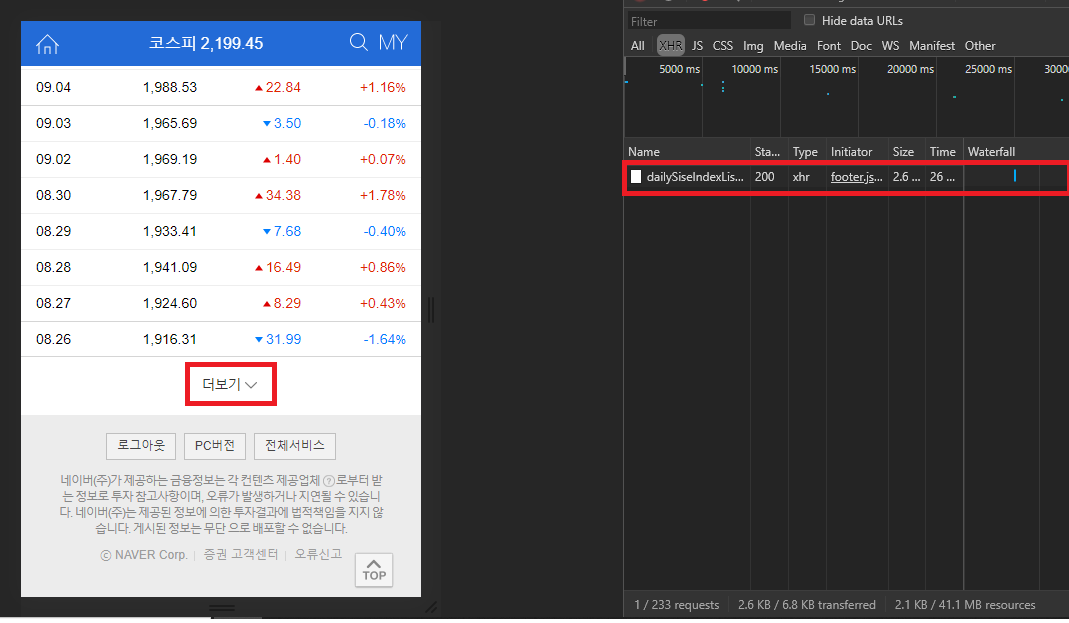
</div>



- 
    - PREVIEW: 요청한 데이터의 결과를 보여준다.
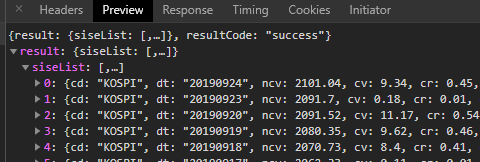

- 2. request, response 하기: json
- 3. 문자열 json 데이터를 dict로 변경(parsing) 후 DataFrame로 만들기

#### 메모

- 모바일 페이지가 있으면 활용할 것: 훨씬 구조도 간단하고 request도 적게 일어난다.

In [1]:
import requests
import pandas as pd

C:\Users\HSS\Documents\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\HSS\Documents\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# 1. 웹서비스 분석 : URL
url = 'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=6'

In [5]:
# 2. request, response: json(str)
def get_data(url):
    response = requests.get(url)
    try:
        data = response.json()['result']['siseList']
    except KeyError:
        data = response.json()['result']['marketIndexDay']
        
    return pd.DataFrame(data)
    

In [6]:
#KOSPI
url = 'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1'
kospi_df = get_data(url)
kospi_df.tail(5)

,cd,cr,cv,dt,hv,lv,ncv,ov
15,KOSPI,-1.71,-37.28,20200130,2187.45,2139.72,2148.00,2181.54
16,KOSPI,0.39,8.56,20200129,2195.45,2172.33,2185.28,2188.18
17,KOSPI,-3.09,-69.41,20200128,2199.93,2166.23,2176.72,2192.22
18,KOSPI,-0.93,-21.12,20200123,2260.63,2241.94,2246.13,2254.54
19,KOSPI,1.23,27.56,20200122,2269.27,2235.13,2267.25,2238.53


In [7]:
#KODSDAQ
url = 'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSDAQ&pageSize=20&page=1'
kosdaq_df = get_data(url)
kosdaq_df.tail(5)

,cd,cr,cv,dt,hv,lv,ncv,ov
15,KOSDAQ,-2.06,-13.79,20200130,673.17,652.42,656.39,670.65
16,KOSDAQ,0.82,5.48,20200129,671.98,664.09,670.18,671.08
17,KOSDAQ,-3.04,-20.87,20200128,668.22,658.78,664.70,660.79
18,KOSDAQ,-0.39,-2.68,20200123,687.71,683.52,685.57,685.94
19,KOSDAQ,1.73,11.73,20200122,688.28,677.05,688.25,677.05


In [24]:
#US달러
url = 'https://www.devyohan.io/usd.json'
usd_df = get_data(url)
usd_df['dt'] = kosdaq_df['dt']
usd_df.tail(5)

,cbv,cr,csv,cv,dt,nv,rv,sv
15,1176.73,-0.34,1136.27,-4.0,20200130,1156.5,1145.2,1167.8
16,1180.80,-0.13,1140.20,-1.5,20200129,1160.5,1149.2,1171.8
17,1182.33,-0.17,1141.67,-2.0,20200128,1162.0,1150.7,1173.3
18,1184.37,0.00,1143.63,0.0,20200123,1164.0,1152.6,1175.4
19,1184.37,0.26,1143.63,3.0,20200122,1164.0,1152.6,1175.4


In [25]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

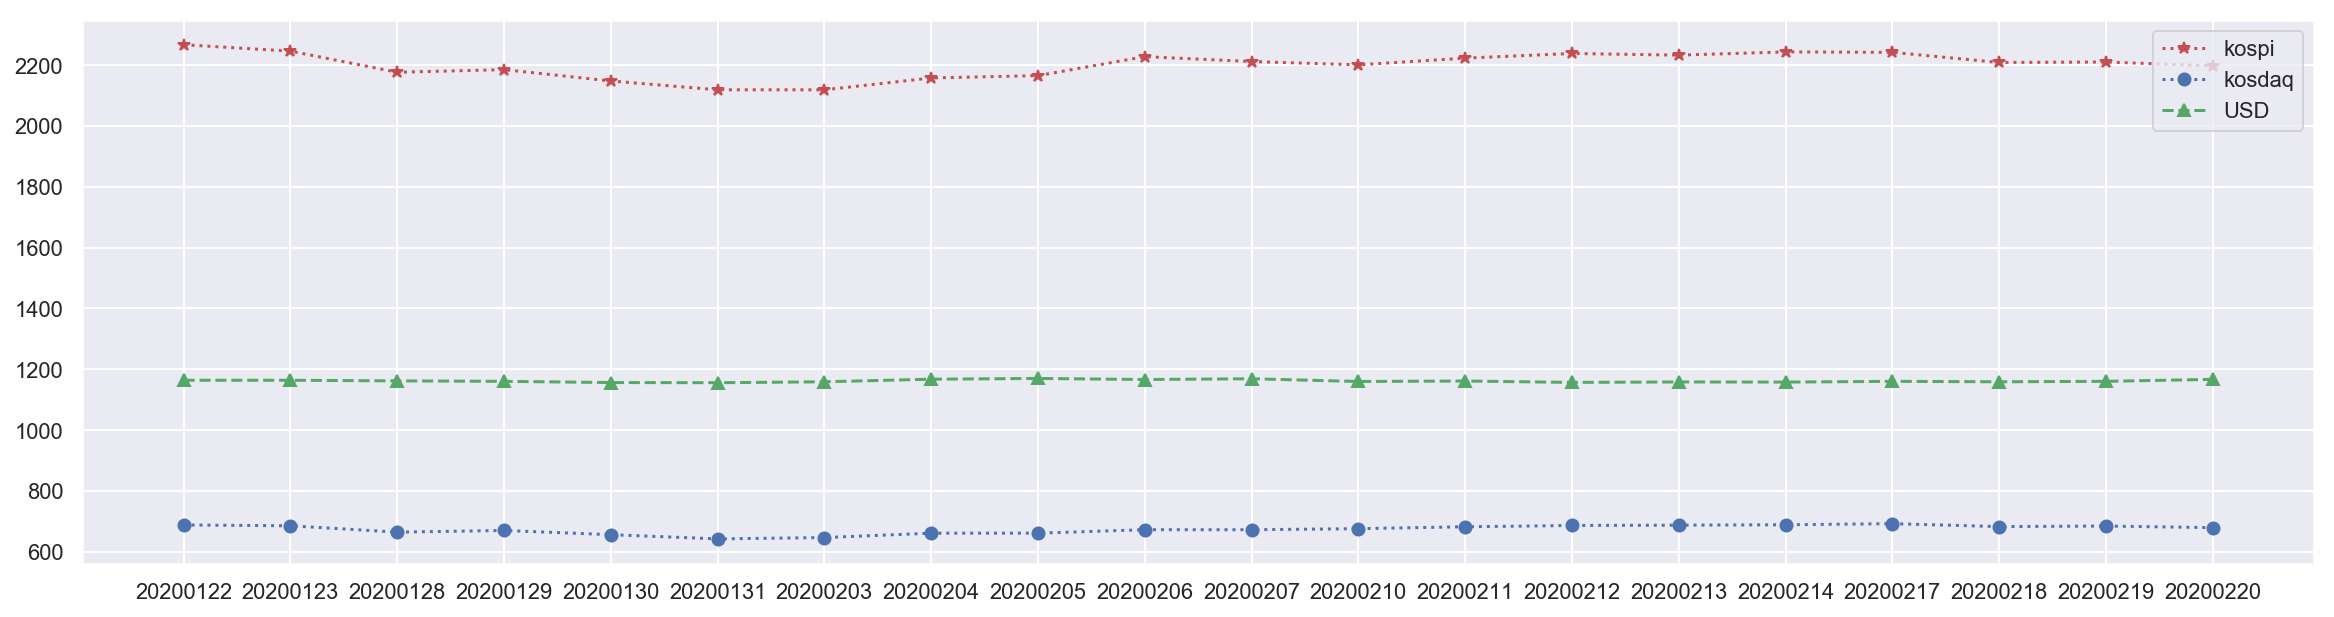

In [27]:
# 코스피 종가 데이터 그리기
plt.figure(figsize = (20,5))
plt.plot(kospi_df['dt'][::-1], kospi_df['ncv'][::-1], 'r*:', label = 'kospi')
plt.plot(kosdaq_df['dt'][::-1], kosdaq_df['ncv'][::-1], 'bo:', label = 'kosdaq')
plt.plot(usd_df['dt'][::-1], usd_df['nv'][::-1], 'g^--', label = 'USD')
plt.legend(loc = 1)
plt.show()

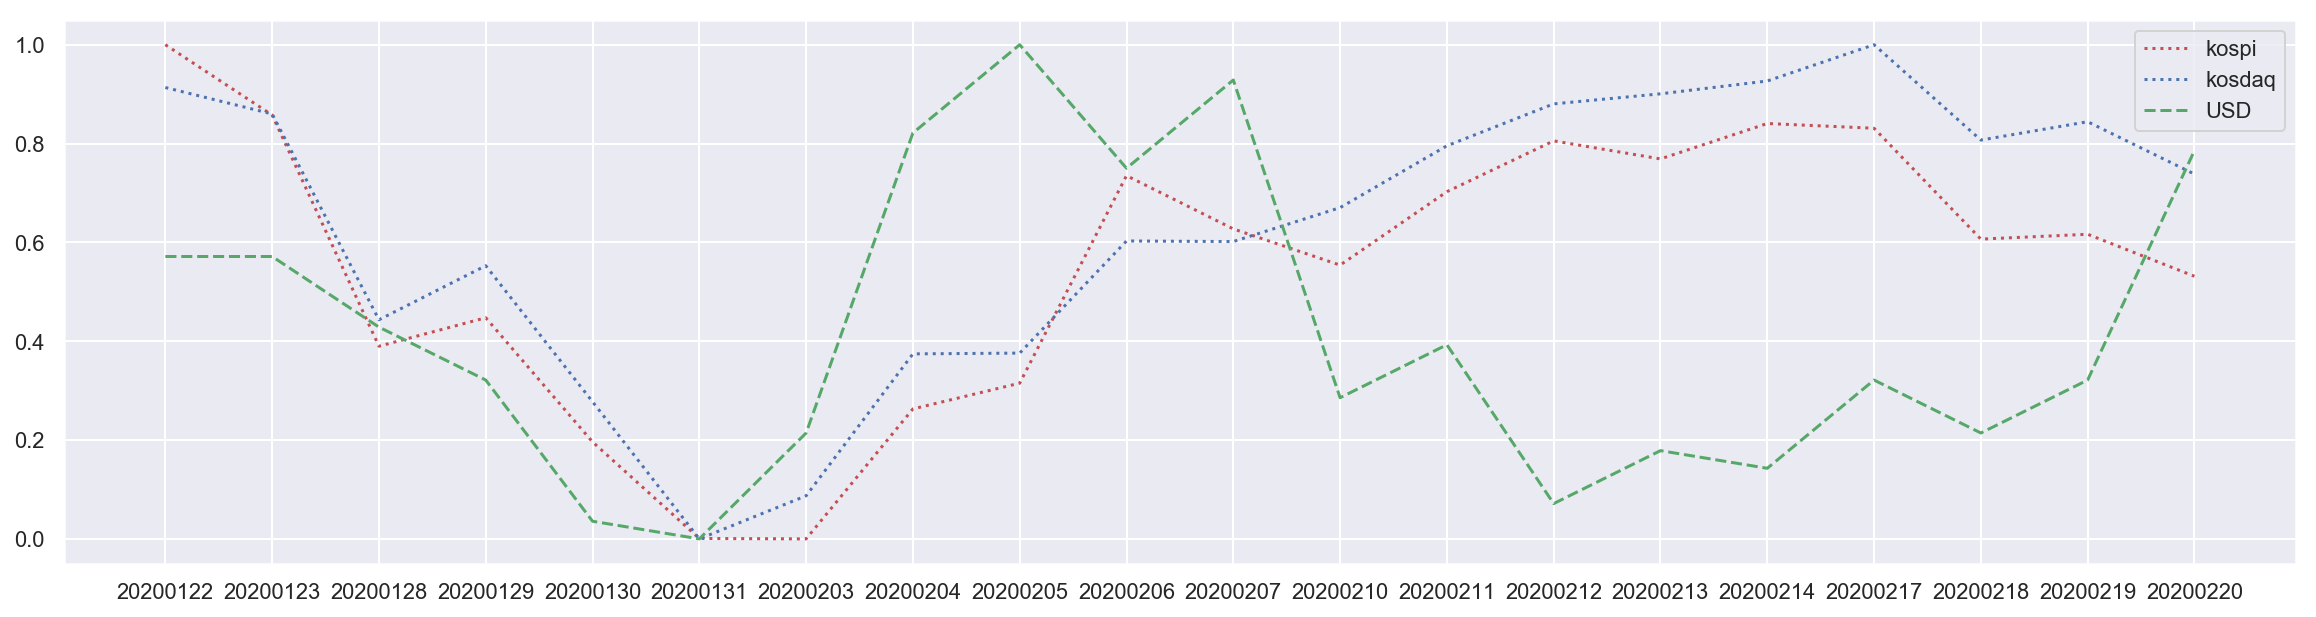

In [28]:
#정규화
from sklearn import preprocessing

plt.figure(figsize = (20,5))
plt.plot(kospi_df['dt'][::-1], preprocessing.minmax_scale(kospi_df['ncv'][::-1]), 'r:', label = 'kospi')
plt.plot(kosdaq_df['dt'][::-1], preprocessing.minmax_scale(kosdaq_df['ncv'][::-1]), 'b:', label = 'kosdaq')
plt.plot(usd_df['dt'][::-1], preprocessing.minmax_scale(usd_df['nv'][::-1]), 'g--', label = 'USD')
plt.legend(loc = 1)
plt.show()

In [29]:
import numpy as np

In [30]:
np.corrcoef(kospi_df['ncv'], kosdaq_df['ncv'])[0,1]

0.9481055398960172

In [31]:
# 둘의 날짜를 강제로 맞춰줬기 때문에 상관관계가 나오지 않는다.
np.corrcoef(kospi_df['ncv'], usd_df['nv'])[0,1]

0.10460103905087931

In [32]:
# 둘의 날짜를 강제로 맞춰줬기 때문에 상관관계가 나오지 않는다.
np.corrcoef(usd_df['nv'], kosdaq_df['ncv'])[0,1]


0.013793971596012013

In [39]:
id_ = 'rich_flavor@naver.com'
pwd_ = '4775825a'
KEY= 'your_key'
lat, lng = 37.8267,-122.4233
url = 'https://api.darksky.net/forecast/{}/{},{}'.format(KEY,lat,lng)
url

'https://api.darksky.net/forecast/your_key/37.8267,-122.4233'

In [34]:
response = requests.get(url)
response

<Response [200]>

In [35]:
response.text
data = response.json()


In [36]:
data['timezone'], data['hourly']['summary']

('America/Los_Angeles', 'Mostly cloudy throughout the day.')

In [37]:
def forecast(lat,lan):
    KEY= 'your_key'
    url = 'https://api.darksky.net/forecast/{}/{},{}'.format(KEY,lat,lan)
    response = requests.get(url)
    return response.json()['timezone'], response.json()['hourly']['summary']

In [38]:
forecast(lat = 37.565, lan = 126.9780) #Seoul

('Asia/Seoul', 'Mostly cloudy throughout the day.')